# What are image histograms?
An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image.[1] It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

_source_ : https://en.wikipedia.org/wiki/Image_histogram

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def show(image = None,title = "Image"):
    size = 8
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

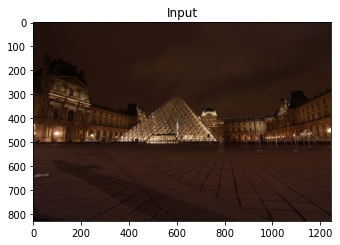

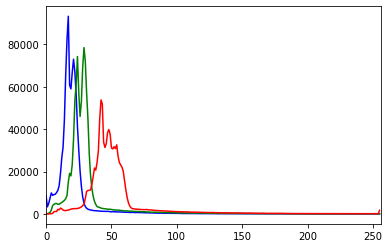

In [7]:
image = cv2.imread('images/input.jpg') #Load image
show(image ,"Input")

#Split image into R G B planes using split function
planes_bgr = cv2.split(image)

color = ('b','g','r') #different color for each histogram
for i , col in enumerate(color):
    hist = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

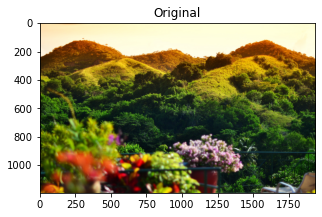

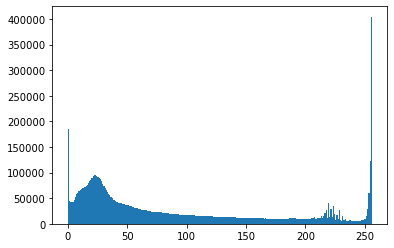

In [11]:
image = cv2.imread('images/tobago.jpg')
show(image,'Original')

plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

# Histogram Equalization
Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

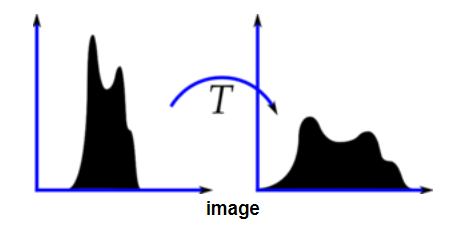

_source_ : https://towardsdatascience.com/histogram-equalization-5d1013626e64

_source_ : https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

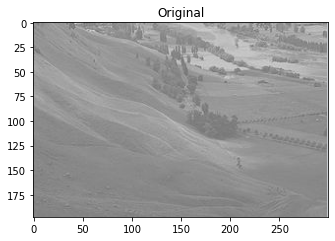

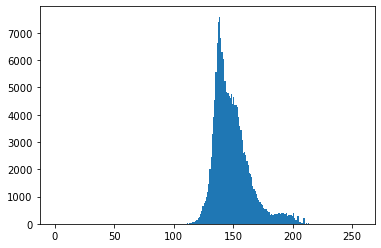

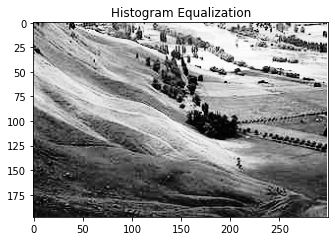

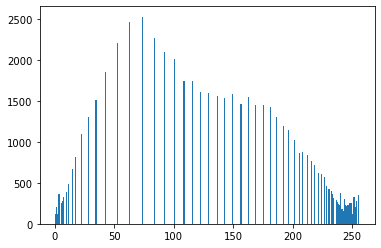

In [20]:
image = cv2.imread('images/hist_equalization.png')
show(image,'Original')

img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #Convert to grayscale

plt.hist(image.ravel(), 256, [0, 256]); plt.show()

#Histogram Equalization:
histogram_eq = cv2.equalizeHist(img_gray)


show(histogram_eq,'Histogram Equalization')
plt.hist(histogram_eq.ravel(),256,[0,256]); plt.show()

# Color Seperation of an Image using K-means Clustering

Color Separation in an image is a process of separating colors in the image. This process is done through the KMeans Clustering Algorithm.K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.K-means algorithms identify k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

_source_ : https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

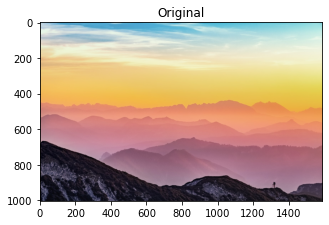

Original Image Shape: (1003, 1587, 3)
After reshaping the image into list of RGB pixels:  (1591761, 3)
Centroids:  [[181.32764185 120.20008757 133.37118582]
 [226.89289984 228.88975591 201.41527205]
 [ 33.20049337  28.55856065  41.72319098]
 [236.49822022 182.56836449 104.20488512]
 [136.34725193 198.48639561 216.93567596]]
Percentages:  [0.2984329933953653, 0.188338575954556, 0.14057889343940452, 0.3030310454898694, 0.06961849172080482]


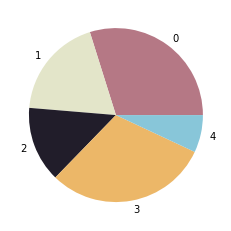

In [42]:
from sklearn.cluster import KMeans
image = cv2.imread('images/k_means.jpg')
show(image,'Original')
print('Original Image Shape:',image.shape)
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img=img.reshape((img.shape[1]*img.shape[0],3))
print('After reshaping the image into list of RGB pixels: ' ,img.shape)
no_of_clusters = 5
kmeans = KMeans(no_of_clusters)
kmeans.fit(img)

labels=kmeans.labels_
labels=list(labels)
centroids = kmeans.cluster_centers_
print('Centroids: ' ,centroids)


#Finding Percentages of each cluster
percent=[]
for i in range(len(centroids)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print('Percentages: ' ,percent)


plt.pie(percent,colors=np.array(centroids/255),labels=np.arange(len(centroids)))
plt.show()